<a href="https://colab.research.google.com/github/Anjasfedo/data-analysis/blob/main/pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
file_path = f"{path}/diabetes.csv"
df = pd.read_csv(file_path)

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Outcome
0    500
1    268
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        99
           1       0.79      0.88      0.84       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



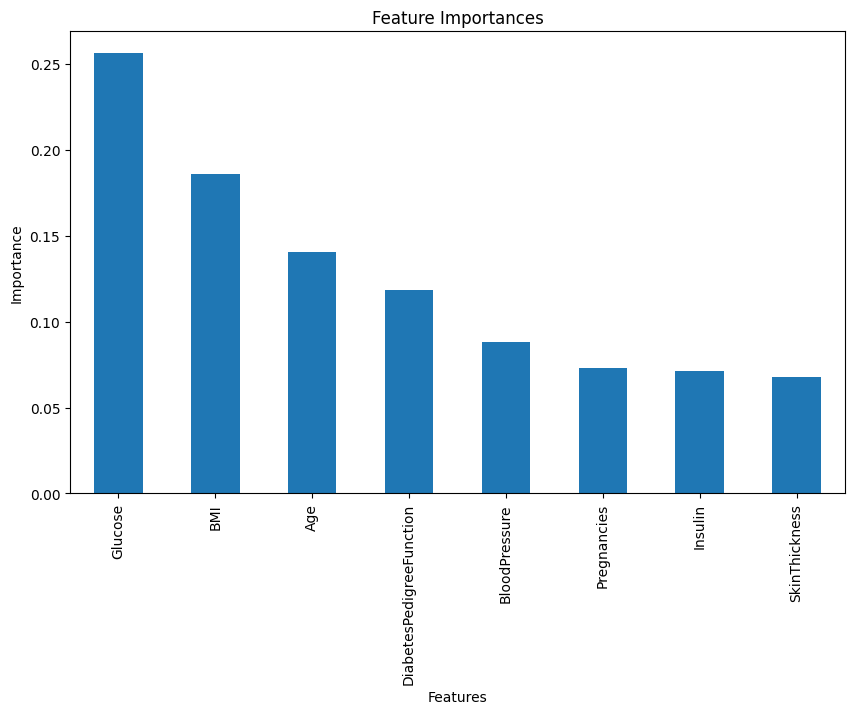

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
print(y.value_counts())
smote = SMOTE()
X_res, y_res =  smote.fit_resample(X, y)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# initialize and training the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

# get feature importances
feature_importances = clf.feature_importances_

# plot feature importances
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1
Dataset Columns: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
stroke
0    4861
1     249
Name: count, dtype: int64


<ipython-input-100-a25271984635>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       975
           1       0.91      0.96      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



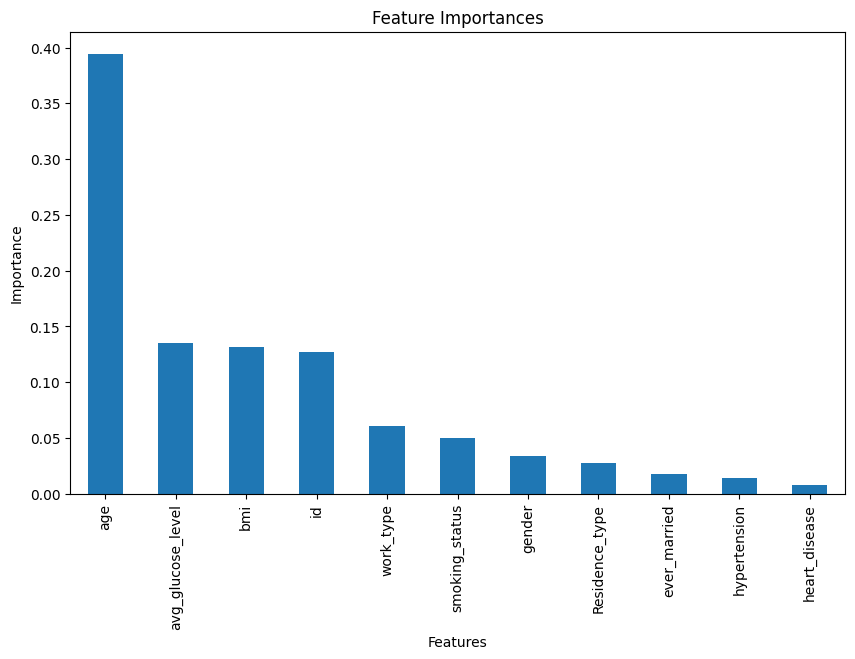

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Download the dataset
import kagglehub
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")
print("Path to dataset files:", path)

# Load the dataset
file_path = f"{path}/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)

# Display column names
print("Dataset Columns:", df.columns)

# Handle missing values (e.g., 'bmi' column)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Encode categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']
print(y.value_counts())
# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = clf.feature_importances_

# Plot feature importances
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1
Dataset Columns: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


<ipython-input-101-ed6fc288ee0c>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



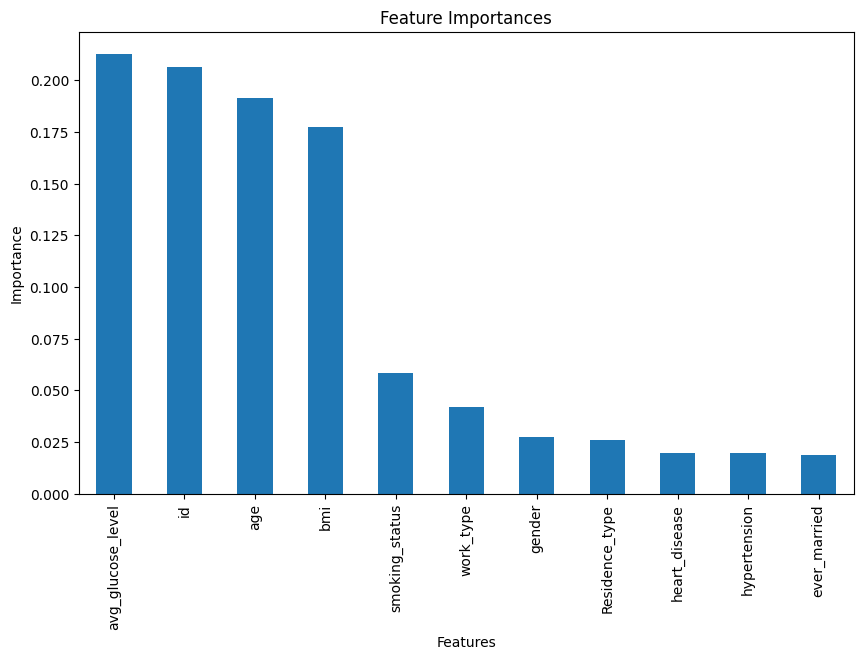

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Download the dataset
import kagglehub
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")
print("Path to dataset files:", path)

# Load the dataset
file_path = f"{path}/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)

# Display column names
print("Dataset Columns:", df.columns)

# Handle missing values (e.g., 'bmi' column)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Encode categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# # Apply SMOTE for oversampling the minority class
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X, y)

# Split the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = clf.feature_importances_

# Plot feature importances
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=8,  # Max depth = range(1,20), use 8
    criterion='entropy',  # Criterion = ['gini', 'entropy'], use 'entropy'
    splitter='best',  # Splitter = ['best', 'random'], use 'best'
    # max_features='auto'  # Max features = ['auto', 'sqrt', 'log2'], use 'auto'
    max_features=None  # Max features = ['auto', 'sqrt', 'log2'], use 'auto'
)

# Initialize Support Vector Machine (SVM)
svm_model = SVC(
    degree=5,  # Degree = range(1,10), use 5
    gamma='scale',  # Gamma = ['scale', 'auto'], use 'scale'
    kernel='rbf'  # Kernel = ['linear', 'poly', 'rbf', 'sigmoid'], use 'rbf'
)

# Initialize Logistic Regression (LR)
lr_model = LogisticRegression(
    # penalty='none',  # Penalty = ['l1', 'l2', 'elasticnet', 'none'], use 'none'
    penalty=None,  # Penalty = ['l1', 'l2', 'elasticnet', 'none'], use 'none'
    solver='lbfgs',  # Solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], use 'lbfgs'
    max_iter=10000  # Max iteration = [100, 1000, 10000], use 10000
)

# Initialize K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(
    n_neighbors=4,  # N neighbors = range(1,20), use 4
    weights='distance',  # Weights = ['uniform', 'distance'], use 'distance'
    algorithm='ball_tree',  # Algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'], use 'ball_tree'
    leaf_size=40,  # Leaf size = range(20,50), use 40
    metric='minkowski',  # Metric = ['minkowski', 'euclidean'], use 'minkowski'
    p=2  # P = range(1,4), use 2
)

# Initialize Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(
    hidden_layer_sizes=(300,),  # Hidden layer sizes = range(100,400), use 300
    activation='relu',  # Activation = ['identity', 'logistic', 'tanh', 'relu'], use 'relu'
    solver='lbfgs',  # Solver = ['lbfgs', 'sgd', 'adam'], use 'lbfgs'
    learning_rate='adaptive'  # Learning rate = ['constant', 'invscaling', 'adaptive'], use 'adaptive'
)

# Print the initialized models
print("Decision Tree Model:", dt_model)
print("Support Vector Machine Model:", svm_model)
print("Logistic Regression Model:", lr_model)
print("K-Nearest Neighbors Model:", knn_model)
print("Multi-Layer Perceptron Model:", mlp_model)


Decision Tree Model: DecisionTreeClassifier(criterion='entropy', max_depth=8)
Support Vector Machine Model: SVC(degree=5)
Logistic Regression Model: LogisticRegression(max_iter=10000, penalty=None)
K-Nearest Neighbors Model: KNeighborsClassifier(algorithm='ball_tree', leaf_size=40, n_neighbors=4,
                     weights='distance')
Multi-Layer Perceptron Model: MLPClassifier(hidden_layer_sizes=(300,), learning_rate='adaptive',
              solver='lbfgs')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset into a Pandas DataFrame
file_path = f"{path}/diabetes.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Define features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Train and evaluate each model
models = {
    "Decision Tree": dt_model,
    "SVM": svm_model,
    "Logistic Regression": lr_model,
    "KNN": knn_model,
    "MLP": mlp_model
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Display results
print("\nModel Performance:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Decision Tree Accuracy: 0.7532
SVM Accuracy: 0.7662
Logistic Regression Accuracy: 0.7532
KNN Accuracy: 0.6883
MLP Accuracy: 0.7143

Model Performance:
Decision Tree: 0.7532
SVM: 0.7662
Logistic Regression: 0.7532
KNN: 0.6883
MLP: 0.7143


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [ ]:
# Initialize base model: Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=8,  # Depth of each tree
    random_state=42
)

# Initialize meta-learner: SVM
svm_meta = SVC(
    kernel='rbf',  # Kernel type
    gamma='scale',  # Kernel coefficient
    probability=True  # Ensure probability outputs for SVM
)

# Create StackingClassifier with RF as base model and SVM as meta-learner
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model)],  # Base model(s)
    final_estimator=svm_meta,  # Meta-learner
    cv=5  # Cross-validation for meta-learner
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on test data
y_pred = stacking_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model (RF + SVM) Accuracy: {accuracy:.4f}")

Stacking Model (RF + SVM) Accuracy: 0.7403


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(n_estimators=100, max_depth=8, random_state=42)
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=8,       # Maximum depth of the trees
    bootstrap=True,    # Enable bootstrapping
    random_state=42    # Random state for reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.4f}")

# Detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Accuracy: 0.7468

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
from sklearn.ensemble import StackingClassifier

# Define base learners and meta-learner
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('svc', SVC(kernel='rbf', probability=True))],
    final_estimator=LogisticRegression()
)

# Train and evaluate the stacking model
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")


Stacking Model Accuracy: 0.7532


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection: Select top k features using ANOVA F-test
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Display selected feature scores
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")

# Initialize models
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=16,
    random_state=42,
    bootstrap=True
)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train Random Forest and evaluate with cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

rf_model.fit(X_train_selected, y_train)
rf_y_pred = rf_model.predict(X_test_selected)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

# Train XGBoost and evaluate with cross-validation
# xgb_cv_scores = cross_val_score(xgb_model, X_train_selected, y_train, cv=5, scoring='accuracy')
# print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")

xgb_model.fit(X_train_selected, y_train)
xgb_y_pred = xgb_model.predict(X_test_selected)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")

# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))

Selected Features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Random Forest Cross-Validation Accuracy: 0.7557 ± 0.0323
Random Forest Test Accuracy: 0.7727
XGBoost Test Accuracy: 0.7338

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:46:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize KFold for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize array to store cross-validation scores
xgb_cv_scores = []

# Perform manual cross-validation
for train_index, val_index in kf.split(X_train_selected):
    X_train_cv, X_val_cv = X_train_selected[train_index], X_train_selected[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train XGBoost
    xgb_model.fit(X_train_cv, y_train_cv)

    # Predict and calculate accuracy
    y_val_pred = xgb_model.predict(X_val_cv)
    acc = accuracy_score(y_val_cv, y_val_pred)
    xgb_cv_scores.append(acc)

# Calculate mean and std of cross-validation scores
xgb_cv_mean = np.mean(xgb_cv_scores)
xgb_cv_std = np.std(xgb_cv_scores)

print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_mean:.4f} ± {xgb_cv_std:.4f}")

# Evaluate on test data
xgb_model.fit(X_train_selected, y_train)
xgb_y_pred = xgb_model.predict(X_test_selected)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:45:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:45:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:45:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:45:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:45:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Accuracy: 0.7183 ± 0.0207


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:45:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Test Accuracy: 0.7338


In [ ]:
from sklearn.metrics import confusion_matrix

svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.5974025974025974
[[83 16]
 [46  9]]
              precision    recall  f1-score   support

           0       0.64      0.84      0.73        99
           1       0.36      0.16      0.23        55

    accuracy                           0.60       154
   macro avg       0.50      0.50      0.48       154
weighted avg       0.54      0.60      0.55       154



In [ ]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
importances = RandomForestClassifier().fit(X_train, y_train).feature_importances_
important_features = X.columns[importances.argsort()[-k:]]
print("Selected Features:", important_features.tolist())


Selected Features: ['BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose']


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Step 1: ANOVA F-test (SelectKBest)
selector_kbest = SelectKBest(score_func=f_classif, k=5)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)

# Step 2: RFE (Recursive Feature Elimination)
model = LogisticRegression(max_iter=1000, random_state=42)
selector_rfe = RFE(estimator=model, n_features_to_select=3)
X_train_rfe = selector_rfe.fit_transform(X_train_kbest, y_train)

# Final Selected Features
final_features = X.columns[selector_kbest.get_support()][selector_rfe.support_]
print("Final Selected Features:", final_features.tolist())


Final Selected Features: ['Pregnancies', 'BMI', 'DiabetesPedigreeFunction']


In [ ]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection: Select top k features using ANOVA F-test
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train_selected, y_train)
y_pred = svc.predict(X_test_selected)
print(accuracy_score(y_train, svc.predict(X_train_selected)))
svc_acc = accuracy_score(y_test, svc.predict(X_test_selected))
print(accuracy_score(y_test, svc.predict(X_test_selected)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9185667752442996
0.7142857142857143
[[75 24]
 [20 35]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



In [ ]:
from imblearn.over_sampling import SMOTE

k = 5  # Pilih 5 fitur terbaik
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

# Step 2: Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=16,      # Maximum depth of trees
    random_state=42
)

rf_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluasi model
y_pred = rf_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Selected Features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but RandomForestClassifier is expecting 8 features as input.

In [ ]:
from imblearn.over_sampling import SMOTE

# k = 5  # Pilih 5 fitur terbaik
# selector = SelectKBest(score_func=f_classif, k=k)
# X_train_selected = selector.fit_transform(X_train, y_train)
# X_test_selected = selector.transform(X_test)

# selected_features = X.columns[selector.get_support()]
# print("Selected Features:", selected_features.tolist())

# Step 2: Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=16,      # Maximum depth of trees
    random_state=42
)

rf_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluasi model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Test Accuracy: 0.7727

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        99
           1       0.65      0.78      0.71        55

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/chronic-kidney-disease-dataset-analysis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis/versions/1'

In [ ]:
file_path = f"{path}/Chronic_Kidney_Dsease_data.csv"
data = pd.read_csv(file_path)

data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [ ]:
# drop Unecessary PatientID and DoctorInCharge columns
data.drop(columns = ['PatientID', 'DoctorInCharge'], inplace = True)

Diagnosis
1    1524
0     135
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       297
           1       0.96      0.96      0.96       313

    accuracy                           0.96       610
   macro avg       0.96      0.96      0.96       610
weighted avg       0.96      0.96      0.96       610



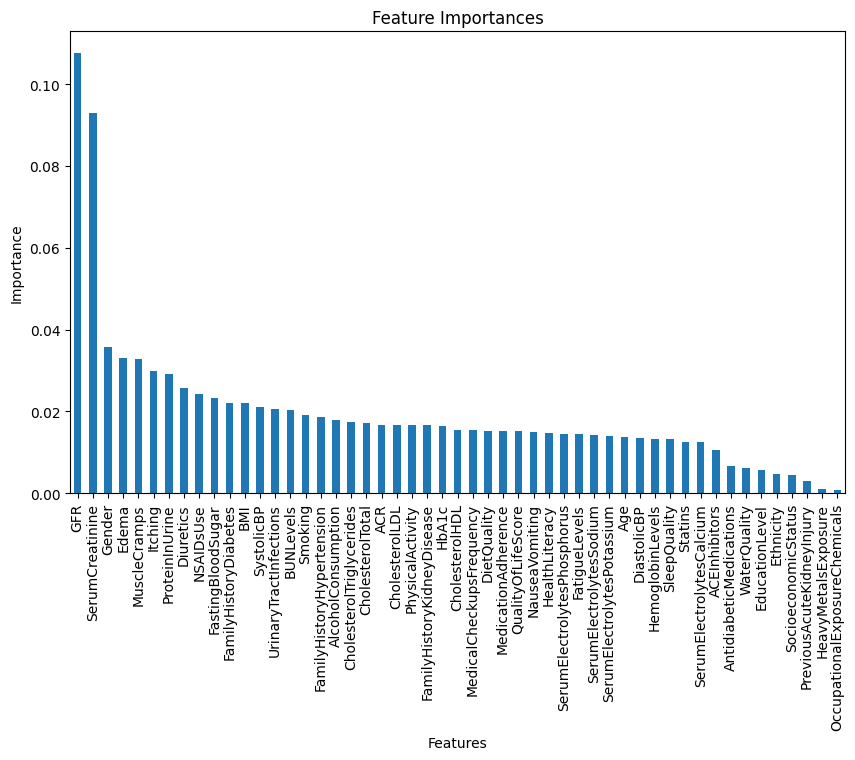

In [ ]:

import matplotlib.pyplot as plt

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
print(y.value_counts())
smote = SMOTE()
X_res, y_res =  smote.fit_resample(X, y)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# initialize and training the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

# get feature importances
feature_importances = clf.feature_importances_

# plot feature importances
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()